In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\admin\Desktop\SelfCaseStudy\National AQI Project\archive (1)\city_hour.csv", parse_dates=['Datetime'], dayfirst=True)

In [3]:
df['Datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 438245 entries, 0 to 438244
Series name: Datetime
Non-Null Count   Dtype         
--------------   -----         
438245 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


In [4]:
# Generating summary statistics for key air quality metrics
summary_statistics = df[['PM2.5', 'PM10', 'AQI']].describe()

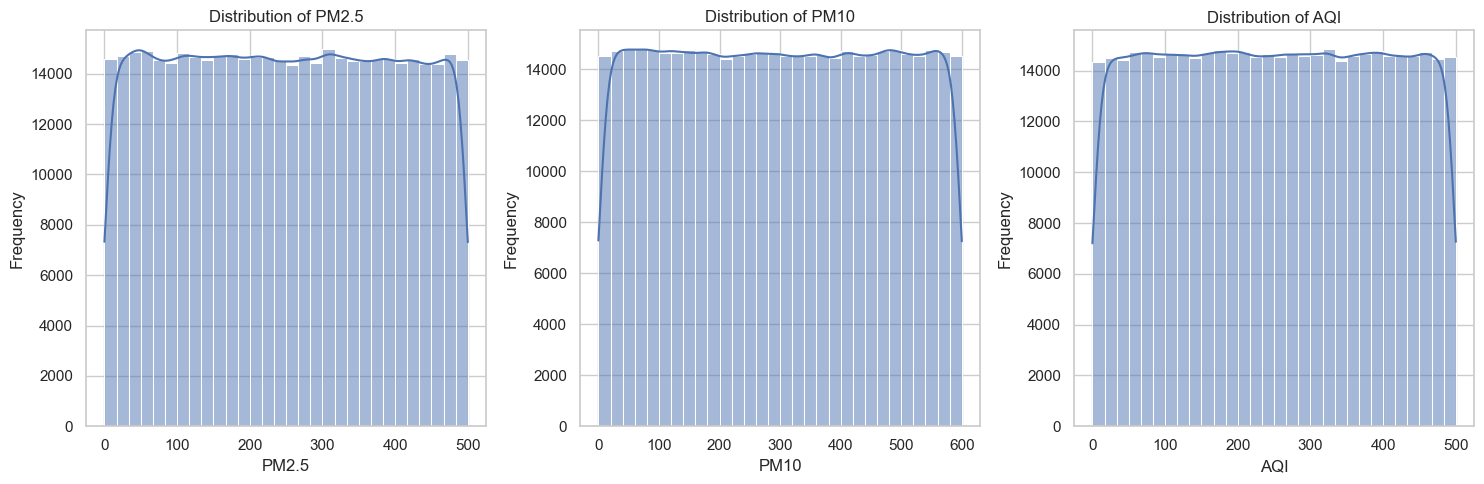

,PM2.5,PM10,AQI
count,438245.000000,438245.000000,438245.000000
mean,249.418096,299.639617,250.095557
std,144.360171,173.399412,144.129039
min,0.000000,0.000000,0.000000
25%,124.400000,149.000000,125.400000
50%,249.100000,299.400000,250.000000
75%,374.300000,450.200000,374.900000
max,500.000000,600.000000,500.000000


In [5]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')

# Creating histograms for PM2.5, PM10, and AQI
plt.figure(figsize=(15, 5))

# PM2.5 Histogram
plt.subplot(1, 3, 1)
sns.histplot(df['PM2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')

# PM10 Histogram
plt.subplot(1, 3, 2)
sns.histplot(df['PM10'], bins=30, kde=True)
plt.title('Distribution of PM10')
plt.xlabel('PM10')
plt.ylabel('Frequency')

# AQI Histogram
plt.subplot(1, 3, 3)
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')

# Displaying the summary statistics and the plots
plt.tight_layout()
plt.show()
summary_statistics

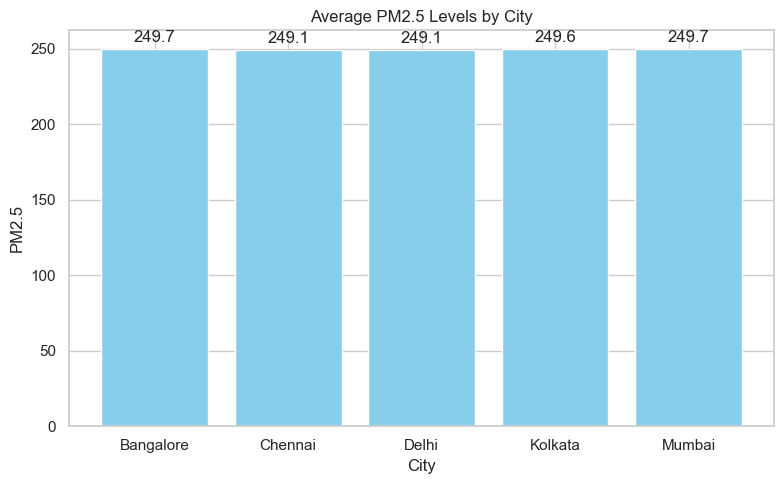

In [8]:
import matplotlib.pyplot as plt

# Step 1: Aggregate PM2.5 by City (mean)
city_avg = df.groupby('City')['PM2.5'].mean().reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(city_avg['City'], city_avg['PM2.5'], color='skyblue')

plt.title('Average PM2.5 Levels by City')
plt.xlabel('City')
plt.ylabel('PM2.5')

# Step 3: Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.1f}', ha='center')

plt.tight_layout()
plt.show()

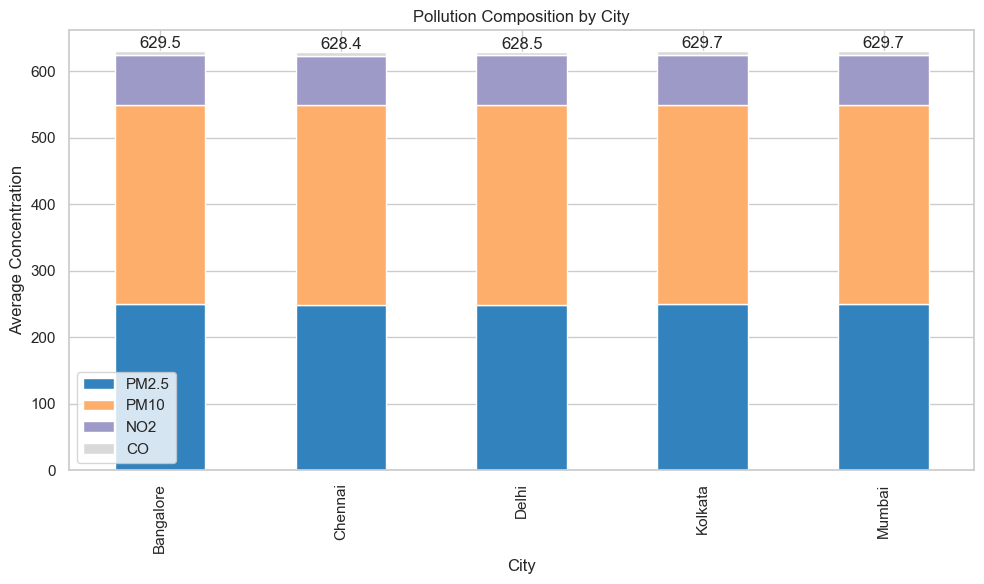

In [6]:
import matplotlib.pyplot as plt

# Step 1: Aggregate pollutants by city (e.g., mean or sum)
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']
df_grouped = df.groupby('City')[pollutants].mean()  # or .sum() depending on your use case

# Step 2: Plot
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')

plt.title('Pollution Composition by City')
plt.ylabel('Average Concentration')

# Step 3: Add total labels on top of bars
for i, (index, row) in enumerate(df_grouped.iterrows()):
    total = row.sum()
    plt.text(i, total + 5, f'{total:.1f}', ha='center')

plt.tight_layout()
plt.show()

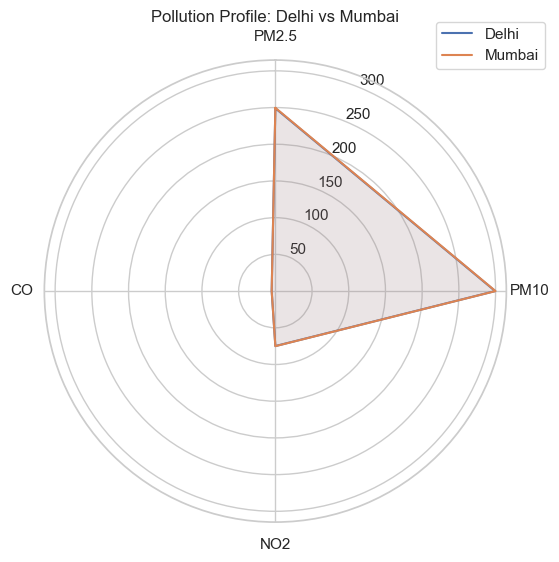

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Aggregate (mean) pollution levels for selected cities
categories = ['PM2.5', 'PM10', 'NO2', 'CO']
N = len(categories)

# Group by city and compute average
city_avg = df.groupby('City')[categories].mean()

# Extract values for the radar chart
cities = ['Delhi', 'Mumbai']
values = [city_avg.loc[city].tolist() + [city_avg.loc[city].tolist()[0]] for city in cities]  # repeat first value

# Angles for radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)

# Add plots for each city
for city_vals, city_name in zip(values, cities):
    ax.plot(angles, city_vals, label=city_name)
    ax.fill(angles, city_vals, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Pollution Profile: Delhi vs Mumbai')
plt.show()

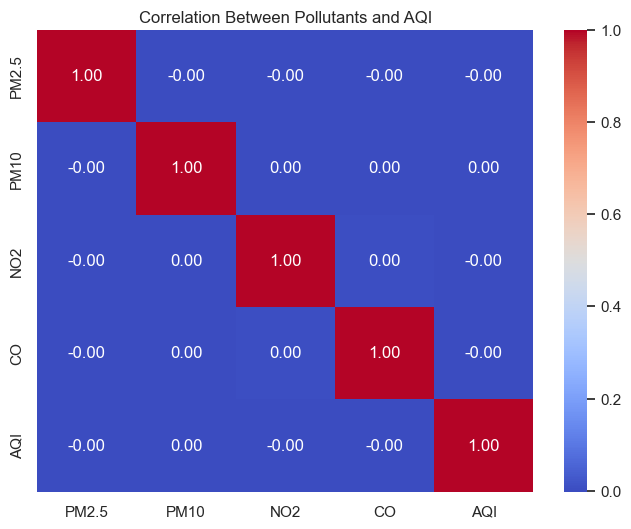

In [9]:
# 4. Heatmap – Pollutant Correlation

corr = df[['PM2.5', 'PM10', 'NO2', 'CO', 'AQI']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants and AQI')
plt.show()

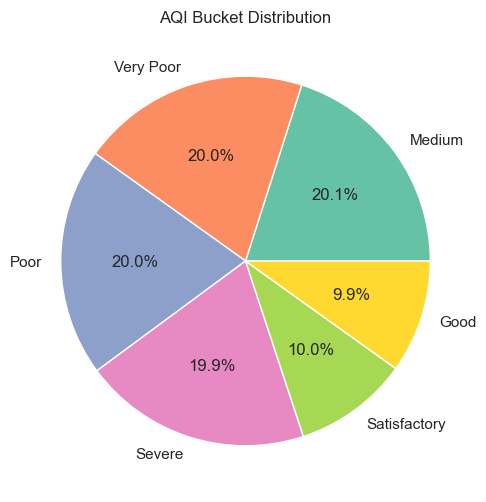

In [11]:
# 5. Pie Chart – AQI Bucket Distribution

bucket_counts = df['AQI_Bucket'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(bucket_counts, labels=bucket_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('AQI Bucket Distribution')
plt.show()